In [1]:
from scipy.ndimage import zoom
import numpy as np

def init():
    from ptycho import params as p
    
    p.cfg['gridsize'] = 1
    p.cfg['nepochs'] = 50
    p.cfg['output_prefix'] = 'tmp'
    p.cfg['nimgs_train'] = 1
    p.cfg['nimgs_test'] = 1
    p.cfg['data_source'] = 'generic'
    p.cfg['intensity_scale.trainable'] = True
    p.cfg['positions.provided'] = True
    p.cfg['probe.big'] = True
    p.cfg['probe_scale'] = 5
    p.cfg['probe.mask'] = False
    p.cfg['train_data_file_path'] = 'train_data.npz'
    p.cfg['test_data_file_path'] = 'test_data.npz'
# def probeshow(probeGuess):
#     # Creating a figure with two subplots
#     fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

#     # Plotting the magnitude of the complex array
#     img1 = ax1.imshow(np.abs(probeGuess), cmap='viridis')
#     ax1.set_title('probe amplitude')
#     fig.colorbar(img1, ax=ax1, orientation='vertical')

#     # Plotting the phase of the complex array
#     img2 = ax2.imshow(np.angle(probeGuess), cmap='jet')
#     ax2.set_title('probe phase')
#     fig.colorbar(img2, ax=ax2, orientation='vertical')

#     # Improving layout
#     plt.tight_layout()
#     plt.show()
def probeshow(probeGuess):
    # Creating a figure with three subplots
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

    # Plotting the magnitude of the complex array
    img1 = ax1.imshow(np.abs(probeGuess), cmap='viridis')
    ax1.set_title('probe amplitude')
    fig.colorbar(img1, ax=ax1, orientation='vertical')

    # Plotting the phase of the complex array
    img2 = ax2.imshow(np.angle(probeGuess), cmap='jet')
    ax2.set_title('probe phase')
    fig.colorbar(img2, ax=ax2, orientation='vertical')

    # Plotting the scan point positions
    ax3.scatter(*(test_data['global_offsets'].squeeze().T))
    ax3.set_title('scan point positions')

    # Improving layout
    plt.tight_layout()
    plt.show()

def track_dict_changes(input_dict, callback):
    # Copy the original dictionary to track changes
    original_dict = input_dict.copy()
    # Execute the callback function
    callback(input_dict)
    # Determine which keys have changed or added
    changed_or_added_keys = [key for key in input_dict if input_dict.get(key) != original_dict.get(key)]
    return changed_or_added_keys

# IMPORTANT: must call init() BEFORE the dataset definition
init()

In [2]:
# !ln ../tests/test_generic_loader.py
import test_generic_loader
test_generic_loader.test_generic_loader(False)

2024-01-11 14:23:33.467035: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-11 14:23:33.556479: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-11 14:23:33.976918: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/ollie/anaconda3/envs/tf/lib/:/home/ollie/anaconda3/envs/tf/lib/
2024-01-11 14:23:33.977001: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin

raw diffraction shape (64, 64, 1087)
neighbor-sampled diffraction shape (1024, 64, 64, 1)
Train data written to train_data.npz
Train data written to test_data.npz


In [3]:
from ptycho import probe
from scipy.ndimage import gaussian_filter as gf
from ptycho import params as p

from ptycho.xpp import *
probe_amp = np.absolute(probeGuess)
mask = np.absolute(p.get('probe_mask'))[:, :, 0, 0]
probe.set_probe_guess(None, probeGuess)

from ptycho.evaluation import save_metrics
from ptycho.evaluation import trim
from ptycho import tf_helper as hh

In [ ]:
tf.random.set_seed(45)
from ptycho import params as p
from ptycho import train, model
from ptycho.train import *

neighbor-sampled diffraction shape (512, 64, 64, 1)
neighbor-sampled diffraction shape (1024, 64, 64, 1)
nphoton 8.998571399976516
1.3932599195244932
input shape (None, 64, 64, 1)
Instructions for updating:
Please pass an integer value for `reinterpreted_batch_ndims`. The current behavior corresponds to `reinterpreted_batch_ndims=tf.size(distribution.batch_shape_tensor()) - 1`.
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 64, 64, 1)]  0           []                               
                                                                                                  
 tf.math.truediv (TFOpLambda)   (None, 64, 64, 1)    0           ['input[0][0]']                  
                                                                                                  
 conv2d (C

 conv2d_14 (Conv2D)             (None, 32, 32, 1)    1117        ['tf.__operators__.getitem_2[0][0
                                                                 ]']                              
                                                                                                  
 up_sampling2d_5 (UpSampling2D)  (None, 64, 64, 64)  0           ['conv2d_21[0][0]']              
                                                                                                  
 amp (Lambda)                   (None, 32, 32, 1)    0           ['conv2d_6[0][0]']               
                                                                                                  
 conv2d_7 (Conv2D)              (None, 64, 64, 1)    577         ['up_sampling2d_2[0][0]']        
                                                                                                  
 phi (Lambda)                   (None, 32, 32, 1)    0           ['conv2d_14[0][0]']              
          

2024-01-11 14:23:46.162586: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2024-01-11 14:23:46.162604: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.
2024-01-11 14:23:46.162639: I tensorflow/core/profiler/backends/gpu/cupti_tracer.cc:1664] Profiler found 1 GPUs
2024-01-11 14:23:46.162853: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcupti.so.11.2'; dlerror: libcupti.so.11.2: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/ollie/anaconda3/envs/tf/lib/:/home/ollie/anaconda3/envs/tf/lib/
2024-01-11 14:23:46.248392: I tensorflow/core/profiler/lib/profiler_session.cc:128] Profiler session tear down.
2024-01-11 14:23:46.248487: I tensorflow/core/profiler/backends/gpu/cupti_tracer.cc:1798] CUPTI activity buffer flushed


Epoch 1/50
input shape (None, 64, 64, 1)
input shape (None, 64, 64, 1)


2024-01-11 14:23:47.690392: I tensorflow/core/util/cuda_solvers.cc:179] Creating GpuSolver handles for stream 0x1c411c60
2024-01-11 14:23:48.725838: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100


31/31 [==============================] - 5s 43ms/step - loss: 205589040.0000 - trimmed_obj_loss: 0.0000e+00 - tf.math.multiply_loss: 111.5673 - distribution_lambda_loss: 205589040.0000 - val_loss: 128202336.0000 - val_trimmed_obj_loss: 0.0000e+00 - val_tf.math.multiply_loss: 88.5927 - val_distribution_lambda_loss: 128202336.0000 - lr: 0.0010
Epoch 2/50
31/31 [==============================] - 0s 15ms/step - loss: 113330864.0000 - trimmed_obj_loss: 0.0000e+00 - tf.math.multiply_loss: 84.1776 - distribution_lambda_loss: 113330864.0000 - val_loss: 98582400.0000 - val_trimmed_obj_loss: 0.0000e+00 - val_tf.math.multiply_loss: 79.3524 - val_distribution_lambda_loss: 98582400.0000 - lr: 0.0010
Epoch 3/50
31/31 [==============================] - 0s 15ms/step - loss: 85740160.0000 - trimmed_obj_loss: 0.0000e+00 - tf.math.multiply_loss: 73.6825 - distribution_lambda_loss: 85740160.0000 - val_loss: 75532056.0000 - val_trimmed_obj_loss: 0.0000e+00 - val_tf.math.multiply_loss: 69.5858 - val_distrib

In [ ]:
from ptycho.nbutils import *

In [ ]:
# channel dimensions size should be 1 in CDI mode, 4 in ptycho mode
test_data['X'].shape

In [9]:
%%time
obj_tensor_full, global_offsets = reconstruct_image(test_data)

input shape (32, 64, 64, 1)
32/32 [==============================] - 1s 22ms/step
CPU times: user 1.18 s, sys: 85.6 ms, total: 1.26 s
Wall time: 1.17 s


In [10]:
recon_amp_ptychopinn = np.absolute(loader.reassemble_position(obj_tensor_full,
                                                  global_offsets[:, :, :, :],
                                              M = 20))

recon_phase_ptychopinn = np.angle(loader.reassemble_position(obj_tensor_full,
                                                  global_offsets[:, :, :, :],
                                              M = 20))

# ptycho_pinn_phase = (recon_phase_ptychopinn[..., 0])
# ptycho_pinn_amplitude = (recon_amp_ptychopinn[..., 0])
ptycho_pinn_phase = crop_to_non_uniform_region_with_buffer(recon_phase_ptychopinn[..., 0], buffer=23)
ptycho_pinn_amplitude = crop_to_non_uniform_region_with_buffer(recon_amp_ptychopinn[..., 0], buffer=23)

In [11]:
# %timeit -n 1 -r 1 model.diffraction_to_obj.predict(test_data['X'] * model.params()['intensity_scale'])

32/32 [==============================] - 0s 8ms/step
418 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [ ]:
plt.imshow(np.abs(probeGu))

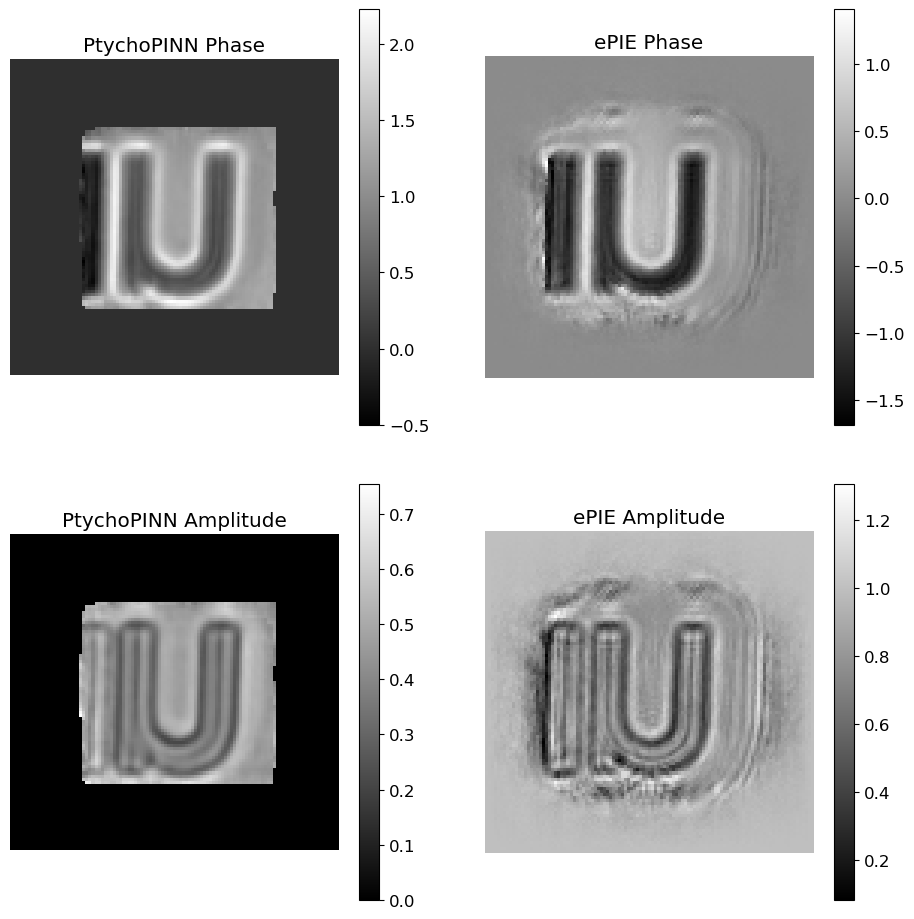

In [11]:
recon_amp = np.absolute(loader.reassemble_position(obj_tensor_full,
                                                  global_offsets[:, :, :, :],
                                              M = 20))

recon_phase = np.angle(loader.reassemble_position(obj_tensor_full,
                                                  global_offsets[:, :, :, :],
                                              M = 20))

epie_phase = crop_to_non_uniform_region_with_buffer(np.angle(obj['objectGuess']))
epie_amplitude = crop_to_non_uniform_region_with_buffer(np.absolute(obj['objectGuess']))

mk_epie_comparison2x2(ptycho_pinn_phase, epie_phase, ptycho_pinn_amplitude,epie_amplitude)

# 2x2

In [1]:
from scipy.ndimage import zoom
import numpy as np

# Demo init
def init():
    from ptycho import params as p
    p.cfg['positions.provided'] = True
    p.cfg['set_phi'] = False
    p.cfg['nepochs'] = 50
    
    p.cfg['nll_weight'] = 1.
    p.cfg['mae_weight'] = 0.
    p.cfg['tv_weight'] = 0#50#1e1#1e1
    
    p.cfg['probe_scale'] = 5

    p.cfg['offset'] = 4
    p.cfg['sim_jitter_scale'] = 0.#0.1
    p.cfg['max_position_jitter'] = 10
    p.cfg['output_prefix'] = 'tmp'

    p.cfg['n_filters_scale'] = 2
    p.cfg['object.big'] = True
    p.cfg['probe.big'] = True
    
    p.cfg['intensity_scale.trainable'] = True
    p.cfg['probe.trainable'] = False
    p.cfg['probe.mask'] = False
    p.cfg['nphotons'] = 1e9
    
    p.cfg['outer_offset_train'] = None
    p.cfg['outer_offset_test'] = None
    p.cfg['nimgs_train'] = 1
    p.cfg['nimgs_test'] = 1
    
    p.cfg['gridsize'] = 2
    p.cfg['data_source'] = 'generic'
    
    p.cfg['train_data_file_path'] = 'train_data.npz'
    p.cfg['test_data_file_path'] = 'test_data.npz'
# IMPORTANT: must call init() BEFORE the dataset definition
init()

In [2]:
import test_generic_loader
test_generic_loader.test_generic_loader(False)

2024-01-11 14:24:12.086519: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-11 14:24:12.178447: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-11 14:24:12.607086: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/ollie/anaconda3/envs/tf/lib/:/home/ollie/anaconda3/envs/tf/lib/
2024-01-11 14:24:12.607162: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin

raw diffraction shape (64, 64, 1087)
neighbor-sampled diffraction shape (1024, 64, 64, 4)
Train data written to train_data.npz
Train data written to test_data.npz


In [3]:
from ptycho import tf_helper
from ptycho import probe
from scipy.ndimage import gaussian_filter as gf
from ptycho import params as p

from ptycho.xpp import *
probe_amp = np.absolute(probeGuess)
mask = np.absolute(p.get('probe_mask'))[:, :, 0, 0]
probe.set_probe_guess(None, probeGuess)

from ptycho.evaluation import save_metrics
from ptycho.evaluation import trim
from ptycho import tf_helper as hh

In [4]:
tf.random.set_seed(45)
from ptycho import params as p

from ptycho import train, model

from ptycho.train import *

neighbor-sampled diffraction shape (512, 64, 64, 4)
neighbor-sampled diffraction shape (1024, 64, 64, 4)
nphoton 8.998597946677688
1.386912286978546
input shape (None, 64, 64, 1)
Instructions for updating:
Please pass an integer value for `reinterpreted_batch_ndims`. The current behavior corresponds to `reinterpreted_batch_ndims=tf.size(distribution.batch_shape_tensor()) - 1`.
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 64, 64, 4)]  0           []                               
                                                                                                  
 tf.math.truediv (TFOpLambda)   (None, 64, 64, 4)    0           ['input[0][0]']                  
                                                                                                  
 conv2d (Co

 conv2d_14 (Conv2D)             (None, 32, 32, 4)    4468        ['tf.__operators__.getitem_2[0][0
                                                                 ]']                              
                                                                                                  
 up_sampling2d_5 (UpSampling2D)  (None, 64, 64, 64)  0           ['conv2d_21[0][0]']              
                                                                                                  
 amp (Lambda)                   (None, 32, 32, 1)    0           ['conv2d_6[0][0]']               
                                                                                                  
 conv2d_7 (Conv2D)              (None, 64, 64, 1)    577         ['up_sampling2d_2[0][0]']        
                                                                                                  
 phi (Lambda)                   (None, 32, 32, 4)    0           ['conv2d_14[0][0]']              
          

2024-01-11 14:24:32.426339: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2024-01-11 14:24:32.426359: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.
2024-01-11 14:24:32.426394: I tensorflow/core/profiler/backends/gpu/cupti_tracer.cc:1664] Profiler found 1 GPUs
2024-01-11 14:24:32.427157: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcupti.so.11.2'; dlerror: libcupti.so.11.2: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/ollie/anaconda3/envs/tf/lib/:/home/ollie/anaconda3/envs/tf/lib/
2024-01-11 14:24:32.525879: I tensorflow/core/profiler/lib/profiler_session.cc:128] Profiler session tear down.
2024-01-11 14:24:32.525975: I tensorflow/core/profiler/backends/gpu/cupti_tracer.cc:1798] CUPTI activity buffer flushed


Epoch 1/50
input shape (None, 64, 64, 1)
input shape (None, 64, 64, 1)


2024-01-11 14:24:34.248192: I tensorflow/core/util/cuda_solvers.cc:179] Creating GpuSolver handles for stream 0x889b090
2024-01-11 14:24:35.232515: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100


31/31 [==============================] - 5s 42ms/step - loss: 1589061120.0000 - trimmed_obj_loss: 0.0000e+00 - tf.math.multiply_loss: 137.5191 - distribution_lambda_loss: 1589061120.0000 - val_loss: 710916096.0000 - val_trimmed_obj_loss: 0.0000e+00 - val_tf.math.multiply_loss: 102.1758 - val_distribution_lambda_loss: 710916096.0000 - lr: 0.0010
Epoch 2/50
31/31 [==============================] - 1s 18ms/step - loss: 734032128.0000 - trimmed_obj_loss: 0.0000e+00 - tf.math.multiply_loss: 104.3904 - distribution_lambda_loss: 734032128.0000 - val_loss: 691171456.0000 - val_trimmed_obj_loss: 0.0000e+00 - val_tf.math.multiply_loss: 100.3992 - val_distribution_lambda_loss: 691171456.0000 - lr: 0.0010
Epoch 3/50
31/31 [==============================] - 1s 18ms/step - loss: 749701632.0000 - trimmed_obj_loss: 0.0000e+00 - tf.math.multiply_loss: 105.0904 - distribution_lambda_loss: 749701632.0000 - val_loss: 774740096.0000 - val_trimmed_obj_loss: 0.0000e+00 - val_tf.math.multiply_loss: 106.1915 -

Epoch 23/50
31/31 [==============================] - 1s 17ms/step - loss: 417789984.0000 - trimmed_obj_loss: 0.0000e+00 - tf.math.multiply_loss: 78.4709 - distribution_lambda_loss: 417789984.0000 - val_loss: 431550464.0000 - val_trimmed_obj_loss: 0.0000e+00 - val_tf.math.multiply_loss: 78.9913 - val_distribution_lambda_loss: 431550464.0000 - lr: 5.0000e-04
Epoch 24/50
31/31 [==============================] - 1s 18ms/step - loss: 418676896.0000 - trimmed_obj_loss: 0.0000e+00 - tf.math.multiply_loss: 78.4260 - distribution_lambda_loss: 418676896.0000 - val_loss: 426254816.0000 - val_trimmed_obj_loss: 0.0000e+00 - val_tf.math.multiply_loss: 78.6817 - val_distribution_lambda_loss: 426254816.0000 - lr: 5.0000e-04
Epoch 25/50
31/31 [==============================] - 1s 17ms/step - loss: 413360288.0000 - trimmed_obj_loss: 0.0000e+00 - tf.math.multiply_loss: 77.9679 - distribution_lambda_loss: 413360288.0000 - val_loss: 426398048.0000 - val_trimmed_obj_loss: 0.0000e+00 - val_tf.math.multiply_l

Epoch 44/50
31/31 [==============================] - 1s 18ms/step - loss: 386428544.0000 - trimmed_obj_loss: 0.0000e+00 - tf.math.multiply_loss: 74.6923 - distribution_lambda_loss: 386428544.0000 - val_loss: 409181728.0000 - val_trimmed_obj_loss: 0.0000e+00 - val_tf.math.multiply_loss: 76.1900 - val_distribution_lambda_loss: 409181728.0000 - lr: 1.0000e-04
Epoch 45/50
31/31 [==============================] - 1s 18ms/step - loss: 385762752.0000 - trimmed_obj_loss: 0.0000e+00 - tf.math.multiply_loss: 74.6354 - distribution_lambda_loss: 385762752.0000 - val_loss: 409077536.0000 - val_trimmed_obj_loss: 0.0000e+00 - val_tf.math.multiply_loss: 75.8811 - val_distribution_lambda_loss: 409077536.0000 - lr: 1.0000e-04
Epoch 46/50
31/31 [==============================] - 1s 18ms/step - loss: 385314528.0000 - trimmed_obj_loss: 0.0000e+00 - tf.math.multiply_loss: 74.5438 - distribution_lambda_loss: 385314528.0000 - val_loss: 409639232.0000 - val_trimmed_obj_loss: 0.0000e+00 - val_tf.math.multiply_l

In [5]:
# channel dimensions size should be 1 in CDI mode, 4 in ptycho mode
train_data['X'].shape

TensorShape([512, 64, 64, 4])

In [6]:
from ptycho.nbutils import *

In [7]:
%%time
obj_tensor_full, global_offsets = reconstruct_image(test_data)

input shape (128, 64, 64, 1)
32/32 [==============================] - 2s 51ms/step
CPU times: user 1.37 s, sys: 289 ms, total: 1.66 s
Wall time: 2.18 s


In [8]:
recon_amp_ptychopinn = np.absolute(loader.reassemble_position(obj_tensor_full,
                                                  global_offsets[:, :, :, :],
                                              M = 20))

recon_phase_ptychopinn = np.angle(loader.reassemble_position(obj_tensor_full,
                                                  global_offsets[:, :, :, :],
                                              M = 20))

# ptycho_pinn_phase = (recon_phase_ptychopinn[..., 0])
# ptycho_pinn_amplitude = (recon_amp_ptychopinn[..., 0])
ptycho_pinn_phase = crop_to_non_uniform_region_with_buffer(recon_phase_ptychopinn[..., 0], buffer=23)
ptycho_pinn_amplitude = crop_to_non_uniform_region_with_buffer(recon_amp_ptychopinn[..., 0], buffer=23)

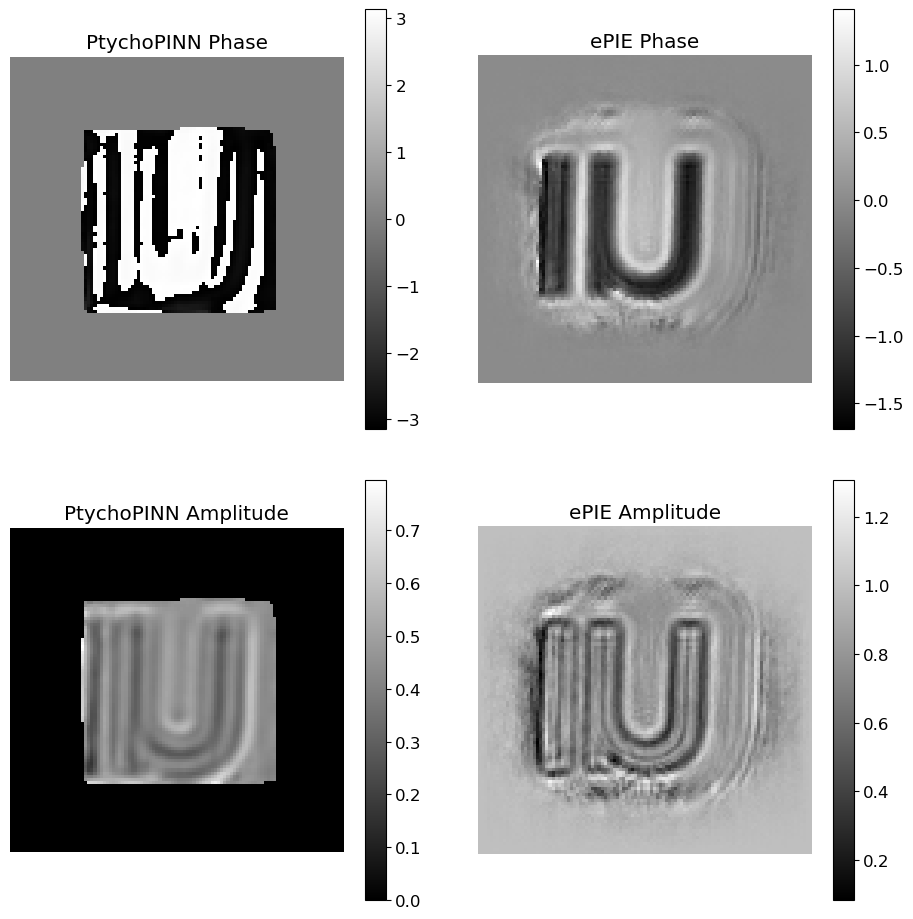

In [9]:
recon_amp = np.absolute(loader.reassemble_position(obj_tensor_full,
                                                  global_offsets[:, :, :, :],
                                              M = 20))

recon_phase = np.angle(loader.reassemble_position(obj_tensor_full,
                                                  global_offsets[:, :, :, :],
                                              M = 20))

epie_phase = crop_to_non_uniform_region_with_buffer(np.angle(obj['objectGuess']))
epie_amplitude = crop_to_non_uniform_region_with_buffer(np.absolute(obj['objectGuess']))

mk_epie_comparison2x2(ptycho_pinn_phase, epie_phase, ptycho_pinn_amplitude,epie_amplitude)

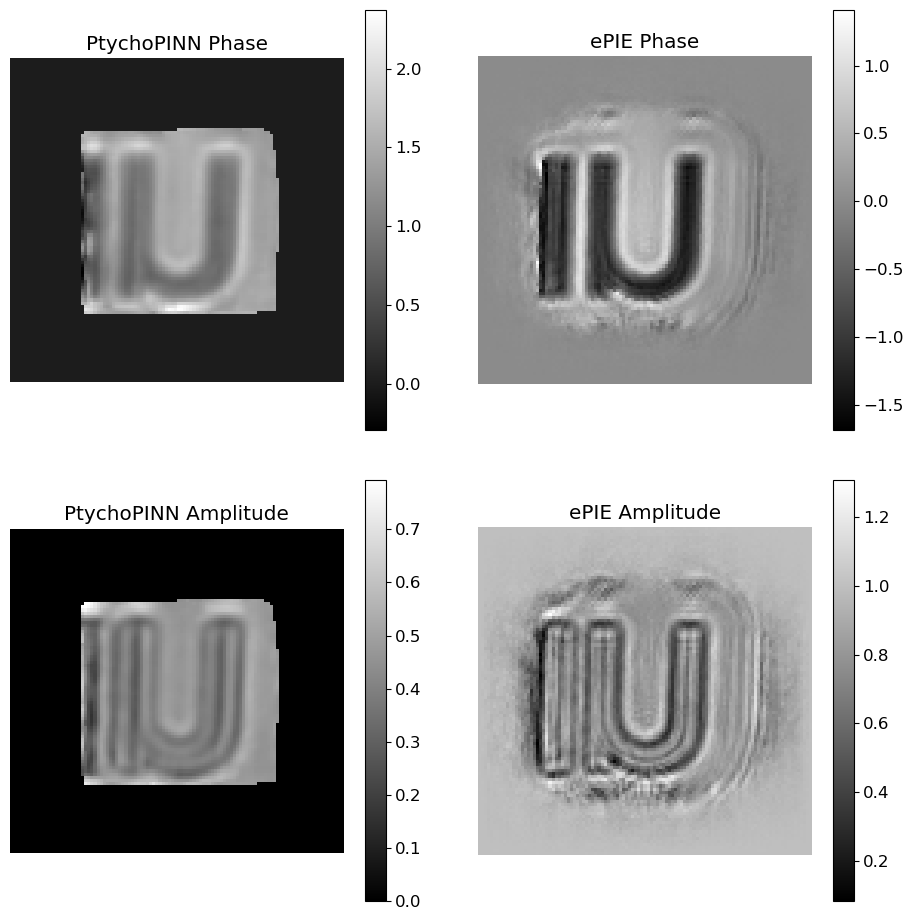

In [10]:
recon_amp = np.absolute(loader.reassemble_position(obj_tensor_full,
                                                  global_offsets[:, :, :, :],
                                              M = 20))

recon_phase = np.angle(loader.reassemble_position(obj_tensor_full,
                                                  global_offsets[:, :, :, :],
                                              M = 20))

epie_phase = crop_to_non_uniform_region_with_buffer(np.angle(obj['objectGuess']))
epie_amplitude = crop_to_non_uniform_region_with_buffer(np.absolute(obj['objectGuess']))

mk_epie_comparison2x2(ptycho_pinn_phase, epie_phase, ptycho_pinn_amplitude,epie_amplitude)

# foo

In [ ]:
def track_dict_changes(input_dict, callback):
    # Copy the original dictionary to track changes
    original_dict = input_dict.copy()
    # Execute the callback function
    callback(input_dict)
    # Determine which keys have changed
    changed_keys = [key for key in input_dict if input_dict[key] != original_dict[key]]
    return changed_keys

In [1]:
def init():
    from ptycho import params as p
    p.cfg['positions.provided'] = True
    p.cfg['data_source'] = 'lines'
    p.cfg['set_phi'] = False
    p.cfg['nepochs'] = 60
    
    p.cfg['nll_weight'] = 1.
    p.cfg['mae_weight'] = 0.
    p.cfg['tv_weight'] = 1e1

    p.cfg['offset'] = 4
    p.cfg['sim_jitter_scale'] = 1.
    p.cfg['max_position_jitter'] = 10
    p.cfg['output_prefix'] = 'tmp'

    p.cfg['gridsize'] = 2
    p.cfg['n_filters_scale'] = 2
    p.cfg['object.big'] = True
    p.cfg['probe.big'] = True
    
    p.cfg['intensity_scale.trainable'] = True
    p.cfg['probe.trainable'] = False
    p.cfg['probe.mask'] = False
    p.cfg['nphotons'] = 1e9
    
    p.cfg['outer_offset_train'] = 8
    p.cfg['outer_offset_test'] = 20
    p.cfg['nimgs_train'] = 2
    p.cfg['nimgs_test'] = 1

init()

from ptycho import probe
from scipy.ndimage import gaussian_filter as gf
from ptycho import params as p

from ptycho.xpp import *
probe_amp = np.absolute(obj['probeGuess'])
mask = np.absolute(p.get('probe_mask'))[:, :, 0, 0]
# probe_amp = gf(np.absolute(obj['probeGuess']) * np.absolute(probe.probe_mask)[:, :, 0], 1) 
# probe_amp = gf(zoomclip(np.absolute(obj['probeGuess'])), 1)
# gaussian_envelope[:, :32] = 0
# probe_amp = gaussian_envelope #* np.absolute(probe.probe_mask)[:, :, 0]
probe.set_probe_guess(None, probe_amp)
# probe.set_probe_guess(None, probe_amp *
#                       mask)

from ptycho.evaluation import save_metrics
from ptycho.evaluation import trim
from ptycho import tf_helper as hh

2024-01-09 14:39:10.855288: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-09 14:39:10.948542: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-09 14:39:11.381322: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/ollie/anaconda3/envs/tf/lib/:/home/ollie/anaconda3/envs/tf/lib/
2024-01-09 14:39:11.381396: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin

raw diffraction shape (64, 64, 1087)
neighbor-sampled diffraction shape (1024, 64, 64, 4)


In [ ]:
from ptycho import params as p
p.cfg['offset'] = 4
p.cfg['max_position_jitter'] = 10
p.cfg['output_prefix'] = 'tmp'

p.cfg['n_filters_scale'] = 2

from ptycho import train, model
# reload(model)
# reload(train)

# print(p.cfg)
from ptycho.train import *

No cached result found. Calculating and caching the result.
simulating gaussian position jitter, scale 1.0
Using provided scan point offsets


/home/ollie/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/ops/gen_math_ops.py:6576: ComplexWarning: Casting complex values to real discards the imaginary part
  _result = pywrap_tfe.TFE_Py_FastPathExecute(


input shape (None, 64, 64, 1)
Instructions for updating:
Please pass an integer value for `reinterpreted_batch_ndims`. The current behavior corresponds to `reinterpreted_batch_ndims=tf.size(distribution.batch_shape_tensor()) - 1`.
No cached result found. Calculating and caching the result.
simulating gaussian position jitter, scale 1.0
Using provided scan point offsets
input shape (None, 64, 64, 1)
nphoton 8.963309
0.99999213
input shape (None, 64, 64, 1)
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 64, 64, 4)]  0           []                               
                                                                                                  
 tf.math.truediv (TFOpLambda)   (None, 64, 64, 4)    0           ['input[0][0]']                  
                              

                                                                                                  
 conv2d_14 (Conv2D)             (None, 32, 32, 4)    4468        ['tf.__operators__.getitem_2[0][0
                                                                 ]']                              
                                                                                                  
 up_sampling2d_5 (UpSampling2D)  (None, 64, 64, 64)  0           ['conv2d_21[0][0]']              
                                                                                                  
 amp (Lambda)                   (None, 32, 32, 1)    0           ['conv2d_6[0][0]']               
                                                                                                  
 conv2d_7 (Conv2D)              (None, 64, 64, 1)    577         ['up_sampling2d_2[0][0]']        
                                                                                                  
 phi (Lamb

2024-01-09 14:40:40.844648: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2024-01-09 14:40:40.844668: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.
2024-01-09 14:40:40.844702: I tensorflow/core/profiler/backends/gpu/cupti_tracer.cc:1664] Profiler found 1 GPUs
2024-01-09 14:40:40.845576: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcupti.so.11.2'; dlerror: libcupti.so.11.2: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/ollie/anaconda3/envs/tf/lib/:/home/ollie/anaconda3/envs/tf/lib/
2024-01-09 14:40:40.928058: I tensorflow/core/profiler/lib/profiler_session.cc:128] Profiler session tear down.
2024-01-09 14:40:40.928387: I tensorflow/core/profiler/backends/gpu/cupti_tracer.cc:1798] CUPTI activity buffer flushed


Epoch 1/60
input shape (None, 64, 64, 1)
input shape (None, 64, 64, 1)


2024-01-09 14:40:47.531829: I tensorflow/core/util/cuda_solvers.cc:179] Creating GpuSolver handles for stream 0x81c7890
2024-01-09 14:40:48.525088: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100


799/799 [==============================] - 18s 17ms/step - loss: 80422360.0000 - trimmed_obj_loss: 11034.2275 - tf.math.multiply_loss: 12.3519 - distribution_lambda_loss: 80422360.0000 - val_loss: 30362512.0000 - val_trimmed_obj_loss: 2555.8386 - val_tf.math.multiply_loss: 10.2606 - val_distribution_lambda_loss: 30362512.0000 - lr: 0.0010
Epoch 2/60
799/799 [==============================] - 13s 16ms/step - loss: 29646048.0000 - trimmed_obj_loss: 3231.1885 - tf.math.multiply_loss: 10.1242 - distribution_lambda_loss: 29646048.0000 - val_loss: 25060412.0000 - val_trimmed_obj_loss: 3524.6775 - val_tf.math.multiply_loss: 9.7911 - val_distribution_lambda_loss: 25060412.0000 - lr: 0.0010
Epoch 3/60
799/799 [==============================] - 13s 16ms/step - loss: 25379164.0000 - trimmed_obj_loss: 4505.0068 - tf.math.multiply_loss: 9.8326 - distribution_lambda_loss: 25379164.0000 - val_loss: 22587606.0000 - val_trimmed_obj_loss: 5845.2798 - val_tf.math.multiply_loss: 9.6671 - val_distribution_

In [ ]:
plt.rcParams["figure.figsize"] = (10, 10)

import matplotlib.pyplot as plt
plt.imshow(np.absolute(stitched_obj)[0], cmap = 'jet', interpolation='none')